# Unemployment and Migration, 2011 and 2016

### Import libraries, Import data, Get a clean dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in B37 Table (2011): Selected Labour Force, Education and Migration Characteristics by Sex
b37 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B37_NSW_SA2_short.csv')

#read in G40 Table (2016): Selected Labour Force, Education and Migration Characteristics by Sex
g40 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G40_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning Table B37 (2011)

In [3]:
# print(list(b37.columns))

In [4]:
#keep only the SA2, % unemployment (all persons), and same vs. different addresses for 1 and 5 years ago (all persons)

b37 = b37[['region_id', 'P_15_yrs_over_P', 
           'lfs_Emplyed_wrked_full_time_P', 'lfs_Emplyed_wrked_part_time_P', 'lfs_Employed_away_from_work_P', 'lfs_Unmplyed_lookng_for_wrk_P', 'lfs_Tot_LF_P', 
           'Migtn_Lvd_same_add_1_yr_ago_P', 'Migtn_Lvd_Diff_add_1_yr_ago_P', 
          'Migtn_Lvd_sme_add_5_yrs_ago_P', 'Mign_Lvd_Diff_add_5_yrs_ago_P']]
# b37.head()

In [5]:
b37.rename(columns={'region_id':'SA2_MAINCODE_2011', 
                    'P_15_yrs_over_P':'total_11', 
                    'lfs_Emplyed_wrked_full_time_P':'lf_empl_full_11', 
                    'lfs_Emplyed_wrked_part_time_P':'lf_empl_part_11', 
                    'lfs_Employed_away_from_work_P':'lf_empl_away_11', 
                    'lfs_Unmplyed_lookng_for_wrk_P':'lf_unemp_11', 
                    'lfs_Tot_LF_P':'lf_total_11',
                    'Migtn_Lvd_same_add_1_yr_ago_P':'1yr_same_11', 
                    'Migtn_Lvd_Diff_add_1_yr_ago_P':'1yr_diff_11', 
                    'Migtn_Lvd_sme_add_5_yrs_ago_P':'5yr_same_11', 
                    'Mign_Lvd_Diff_add_5_yrs_ago_P':'5yr_diff_11'}, inplace=True)
# b37.head()

In [6]:
#one value for employed
b37['lf_empl_11'] = b37['lf_empl_full_11'] + b37['lf_empl_part_11'] + b37['lf_empl_away_11']

#reduce dataframe to needed columns
b37 = b37[['SA2_MAINCODE_2011', 'total_11', 'lf_empl_11', 'lf_unemp_11', 'lf_total_11', '1yr_same_11', '1yr_diff_11', '5yr_same_11', '5yr_diff_11']]

### Correspondence: Fitting 2011 Data to 2016 Geographies

In [7]:
#merge many:many, joining income B37 table (NSW) to the correspondence table (all of Australia)

emp_mig_2011 = pd.merge(b37,corr,on='SA2_MAINCODE_2011',how='right')

In [8]:
#apply correspondence ratio

emp_mig_2011['total_11_sa2'] = emp_mig_2011['total_11'] * emp_mig_2011['RATIO']
emp_mig_2011['lf_empl_11_sa2'] = emp_mig_2011['lf_empl_11'] * emp_mig_2011['RATIO']
emp_mig_2011['lf_unemp_11_sa2'] = emp_mig_2011['lf_unemp_11'] * emp_mig_2011['RATIO']
emp_mig_2011['lf_total_11_sa2'] = emp_mig_2011['lf_total_11'] * emp_mig_2011['RATIO']
emp_mig_2011['1yr_same_11_sa2'] = emp_mig_2011['1yr_same_11'] * emp_mig_2011['RATIO']
emp_mig_2011['1yr_diff_11_sa2'] = emp_mig_2011['1yr_diff_11'] * emp_mig_2011['RATIO']
emp_mig_2011['5yr_same_11_sa2'] = emp_mig_2011['5yr_same_11'] * emp_mig_2011['RATIO']
emp_mig_2011['5yr_diff_11_sa2'] = emp_mig_2011['5yr_diff_11'] * emp_mig_2011['RATIO']

In [9]:
#pull csv and pivot in Excel

emp_mig_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\emp_mig_2011.csv',index=False)

In [10]:
#read back in pivoted data

emp_mig_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\emp_mig_2011_sa2.csv')

### Cleaning Table G40 (2016)

In [11]:
#keep only the SA2, % unemployment (all persons), and same vs. different addresses for 1 and 5 years ago (all persons)

g40 = g40[['SA2_MAINCODE_2016', 'P_15_yrs_over_P', 
           'lfs_Emplyed_wrked_full_time_P', 'lfs_Emplyed_wrked_part_time_P', 'lfs_Employed_away_from_work_P', 'lfs_Unmplyed_lookng_for_wrk_P', 'lfs_Tot_LF_P', 
           'Migtn_Lvd_same_add_1_yr_ago_P', 'Migtn_Lvd_Diff_add_1_yr_ago_P', 
          'Migtn_Lvd_sme_add_5_yrs_ago_P', 'Mign_Lvd_Diff_add_5_yrs_ago_P']]
# g40.head()

In [12]:
g40.rename(columns={'P_15_yrs_over_P':'total_16', 
                    'lfs_Emplyed_wrked_full_time_P':'lf_empl_full_16', 
                    'lfs_Emplyed_wrked_part_time_P':'lf_empl_part_16', 
                    'lfs_Employed_away_from_work_P':'lf_empl_away_16', 
                    'lfs_Unmplyed_lookng_for_wrk_P':'lf_unemp_16', 
                    'lfs_Tot_LF_P':'lf_total_16',
                    'Migtn_Lvd_same_add_1_yr_ago_P':'1yr_same_16', 
                    'Migtn_Lvd_Diff_add_1_yr_ago_P':'1yr_diff_16', 
                    'Migtn_Lvd_sme_add_5_yrs_ago_P':'5yr_same_16', 
                    'Mign_Lvd_Diff_add_5_yrs_ago_P':'5yr_diff_16'}, inplace=True)
# g40.head()

In [13]:
#one value for employed
g40['lf_empl_16'] = g40['lf_empl_full_16'] + g40['lf_empl_part_16'] + g40['lf_empl_away_16']

#reduce dataframe to needed columns
emp_mig_2016 = g40[['SA2_MAINCODE_2016', 'total_16', 'lf_empl_16', 'lf_unemp_16', 'lf_total_16', '1yr_same_16', '1yr_diff_16', '5yr_same_16', '5yr_diff_16']].copy()

### Merge 2011 and 2016 Tables

In [14]:
#merge 2011 and 2016 tables
emp_mig = pd.merge(emp_mig_2011_sa2,emp_mig_2016,on='SA2_MAINCODE_2016',how="right")
emp_mig

,SA2_MAINCODE_2016,total_11_sa2,lf_empl_11_sa2,lf_unemp_11_sa2,lf_total_11_sa2,1yr_same_11_sa2,1yr_diff_11_sa2,5yr_same_11_sa2,5yr_diff_11_sa2,total_16,lf_empl_16,lf_unemp_16,lf_total_16,1yr_same_16,1yr_diff_16,5yr_same_16,5yr_diff_16
0,101021007,2728.000000,1553.000000,66.000000,1619.000000,2707.000000,396.000000,1838.000000,1096.000000,3222,1646,73,1721,2930,431,2008,1211
1,101021008,6775.000000,4546.000000,156.000000,4702.000000,7058.000000,1050.000000,5000.000000,2572.000000,6623,4188,208,4392,6573,947,4795,2410
2,101021009,8672.000000,5427.000000,197.000000,5624.000000,7636.000000,1815.000000,4480.000000,4335.000000,9169,5611,306,5918,7646,2023,4547,4682
3,101021010,3910.000000,2715.000000,82.000000,2797.000000,3374.000000,898.000000,1871.000000,2174.000000,3981,2647,140,2788,3430,886,1977,2148
4,101021011,11007.000000,7817.000000,177.000000,7994.000000,11526.000000,1711.000000,7681.000000,4760.000000,13377,8814,265,9078,12789,2188,8568,5782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,128021607,12921.663580,8794.060120,292.554633,9086.614753,14767.100610,1349.235537,11159.127040,3839.253926,12998,8473,261,8737,14722,1336,11034,4248
574,128021608,5589.046548,3803.721637,126.539548,3930.261185,6387.259054,583.588961,4826.691245,1660.604207,5701,3762,117,3885,6354,465,5005,1597
575,128021609,2999.289870,2041.218243,67.905819,2109.124062,3427.640334,313.175502,2590.181712,891.141867,2965,2196,53,2245,3299,186,2609,780
576,197979799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,122,4,130,322,43,245,104


### Merge SA2 shapes for UCL area

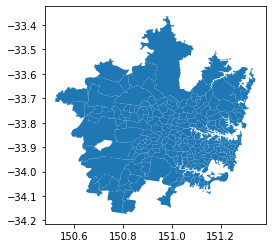

In [15]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [16]:
#merge 2011 and 2016 income data with UCL SA2 data
labor = pd.merge(syd_ucl, emp_mig, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
labor

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,total_11_sa2,lf_empl_11_sa2,lf_unemp_11_sa2,lf_total_11_sa2,1yr_same_11_sa2,1yr_diff_11_sa2,5yr_same_11_sa2,5yr_diff_11_sa2,total_16,lf_empl_16,lf_unemp_16,lf_total_16,1yr_same_16,1yr_diff_16,5yr_same_16,5yr_diff_16
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,16713.000000,10814.000000,466.000000,11280.000000,18135.000000,2438.000000,12315.000000,6738.000000,17923,11194,583,11783,18755,2916,12898,7652
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,14830.000000,10052.000000,452.000000,10504.000000,16333.000000,1782.000000,11981.000000,5185.000000,16144,10585,574,11165,16862,2252,12016,6460
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,4763.999047,3027.999394,121.999976,3149.999370,4987.999002,640.999872,3457.999308,1917.999616,5117,3004,122,3123,5296,611,3603,2167
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,10305.000000,6707.000000,302.000000,7009.000000,10948.000000,1180.000000,8268.000000,3366.000000,10437,6539,314,6846,10998,1091,8153,3586
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,5824.470159,3771.865197,172.057365,3943.922562,6038.819487,894.435615,4114.666512,2425.877505,6037,3823,189,4017,6004,1122,3829,2993
5,115011554,11554,Castle Hill - East,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,2.0720,"POLYGON ((151.02112 -33.71443, 151.02148 -33.7...",115011554,4568.366460,2708.045201,136.707508,2844.752708,4885.060736,508.359576,3495.315571,1621.254864,4798,2168,113,2278,4677,609,3262,1821
6,115011555,11555,Castle Hill - North,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,6.8149,"POLYGON ((150.98369 -33.70475, 150.98364 -33.7...",115011555,9180.406924,5945.134309,271.193187,6216.327496,9518.259811,1409.790537,6485.450506,3823.616919,9573,5917,327,6236,9930,1282,7029,3891
7,115011556,11556,Castle Hill - South,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1277,"POLYGON ((151.00308 -33.73490, 151.00317 -33.7...",115011556,7168.122917,4642.000494,211.749448,4853.749942,7431.920702,1100.773848,5063.882982,2985.505576,7541,4740,251,4991,7840,1133,5231,3394
8,115011557,11557,Castle Hill - West,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,1.6363,"POLYGON ((150.96740 -33.71677, 150.96705 -33.7...",115011557,3839.136390,2668.142400,111.966690,2780.109090,4373.414580,591.885810,2842.914390,1770.026610,4122,2751,152,2905,4480,519,3158,1673
9,115011558,11558,Cherrybrook,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.2514,"POLYGON ((151.03389 -33.71908, 151.03393 -33.7...",115011558,15381.633540,9117.954799,460.292492,9578.247292,16447.939260,1711.640424,11768.684430,5458.745136,15336,9346,526,9876,16041,1885,11842,5706


# UNEMPLOYMENT

### Calculate Percents and Percent Change, 2011 to 2016

In [17]:
#calculate unemployment rates
labor['unemp_11_pct'] = ((labor['lf_unemp_11_sa2'])/(labor['lf_total_11_sa2']))
labor['unemp_16_pct'] = ((labor['lf_unemp_16'])/(labor['lf_total_16']))

#calculate employment-population ratios
labor['emp_pop_11_pct'] = ((labor['lf_empl_11_sa2'])/(labor['total_11_sa2']))
labor['emp_pop_16_pct'] = ((labor['lf_empl_16'])/(labor['total_16']))

In [18]:
#determine unemployment rate in median SA2: 5.1820% (2011)

labor['unemp_11_pct'].describe(percentiles=[.2,.4,.6,.8])

count    264.000000
mean       0.057988
std        0.032097
min        0.000000
20%        0.036707
40%        0.045274
50%        0.051820
60%        0.058077
80%        0.075926
max        0.375000
Name: unemp_11_pct, dtype: float64

In [19]:
#dummy variable for SA2s where unemployment rate > regional median (5.1820%) 2011

labor['unemp_11_ovregmed'] = np.where(labor['unemp_11_pct'] > 0.051820, 1, 0)

In [20]:
#determine unemployment rate in median SA2: 5.2437% (2016)

labor['unemp_16_pct'].describe(percentiles=[.2,.4,.6,.8])

count    263.000000
mean       0.061030
std        0.031742
min        0.000000
20%        0.038196
40%        0.047031
50%        0.052437
60%        0.061973
80%        0.082254
max        0.307692
Name: unemp_16_pct, dtype: float64

In [21]:
#dummy variable for SA2s where unemployment rate > regional median (5.2437%) 2016

labor['unemp_16_ovregmed'] = np.where(labor['unemp_16_pct'] > 0.052437, 1, 0)

In [22]:
#calculate difference in unemployment rate: 2016-2011

labor['pdiff_unemp'] = ((labor['unemp_16_pct'])-(labor['unemp_11_pct']))

In [23]:
#calculate percent change
#divide: [percent difference] / [2011 %]

labor['pchg_unemp'] = (labor['pdiff_unemp'])/(labor['unemp_11_pct'])

In [24]:
#determine % change in unemployment rate in median SA2: +5.3995%

labor['pchg_unemp'].describe(percentiles=[.2,.4,.6,.8])

count    258.000000
mean            inf
std             NaN
min       -1.000000
20%       -0.046697
40%        0.028116
50%        0.053995
60%        0.075277
80%        0.129043
max             inf
Name: pchg_unemp, dtype: float64

In [25]:
#dummy variable for SA2s where reduction in unemployment rate > regional median (+5.3995%) 2011

labor['pchg_unemp_ovregmed'] = np.where(labor['pchg_unemp'] < 0.053995, 1, 0)

# MIGRATION

### Calculate Percents and Percent Change, 2011 to 2016

In [26]:
#calculate % 1 yr difference and 5 yr difference, 2011
labor['1yr_diff_11_pct'] = ((labor['1yr_diff_11_sa2'])/((labor['1yr_diff_11_sa2'])+(labor['1yr_same_11_sa2'])))

labor['5yr_diff_11_pct'] = ((labor['5yr_diff_11_sa2'])/((labor['5yr_diff_11_sa2'])+(labor['5yr_same_11_sa2'])))

#calculate % 1 yr difference and 5 yr difference, 2016
labor['1yr_diff_16_pct'] = ((labor['1yr_diff_16'])/((labor['1yr_diff_16'])+(labor['1yr_same_16'])))

labor['5yr_diff_16_pct'] = ((labor['5yr_diff_16'])/((labor['5yr_diff_16'])+(labor['5yr_same_16'])))


In [27]:
#determine % 1 yr turnover in median SA2: 14.0525% (2016)

labor['1yr_diff_16_pct'].describe(percentiles=[.2,.4,.6,.8])

count    264.000000
mean       0.159446
std        0.069349
min        0.000000
20%        0.108924
40%        0.130863
50%        0.140525
60%        0.154074
80%        0.205912
max        0.666667
Name: 1yr_diff_16_pct, dtype: float64

In [28]:
#NOT INCLUDING THIS STAT
#5 yr turnover is almost the same, but includes some northern coastal suburbs
#without capturing accelerating turnover in Inner West

# labor['5yr_diff_16_pct'].describe(percentiles=[.2,.4,.6,.8])

In [29]:
#dummy variable for SA2s where unemployment rate > regional median (14.0525%) 2016

labor['1yr_diff_ovregmed'] = np.where(labor['1yr_diff_16_pct'] > 0.140525, 1, 0)

### Export to CSV

In [30]:

labor['move1yr_pct_16'] = labor['1yr_diff_16_pct']
labor['move1yr_ovregmed_16'] = labor['1yr_diff_ovregmed']

labor['unemploy_11'] = labor['unemp_11_pct']
labor['unemploy_16'] = labor['unemp_16_pct']
labor['unemploy_ovregmed_11'] = labor['unemp_11_ovregmed']
labor['unemploy_ovregmed_16'] = labor['unemp_16_ovregmed']


In [31]:
output_csv = labor[['SA2_MAINCODE_2016','move1yr_pct_16','move1yr_ovregmed_16','unemploy_11','unemploy_16','unemploy_ovregmed_11','unemploy_ovregmed_16']]
output_csv.to_csv('workers_migrants.csv')

### Map Unemployment, 2011-2016

In [ ]:
#replace missing values with zeroes

labor['unemp_11_pct'].replace(to_replace=np.nan, value=0, inplace=True)
labor['unemp_16_pct'].replace(to_replace=np.nan, value=0, inplace=True)
labor['emp_pop_11_pct'].replace(to_replace=np.nan, value=0, inplace=True)
labor['emp_pop_11_pct'].replace(to_replace=np.inf, value=1, inplace=True)
labor['emp_pop_16_pct'].replace(to_replace=np.nan, value=0, inplace=True)

In [ ]:
# let's isolate the sa2s that make up Redfern/Waterloo
red_wat_gdf = labor[(labor.SA2_MAIN16==117031335)
                          |(labor.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

In [ ]:
# let's isolate the sa2s that make up Marrickville
marr_gdf = labor[(labor.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = labor.plot(column="unemp_11_pct", scheme='user_defined', classification_kwds={'bins':[0.03,0.05,0.07]}, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Percent of Labor Force Unemployed, 2011", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = labor.plot(column="unemp_11_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Unemployment Rate > Regional Median (5.2%), 2011", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = labor.plot(column="pchg_unemp_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Change in Unemployment < Regional Median (+5.0%), 2011 to 2016", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
labor.loc[(labor.SA2_MAIN16==117031335)
            |(labor.SA2_MAIN16==117031338)
            |(labor.SA2_MAIN16==117021326) ]

### Map Migration 2016

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = labor.plot(column="1yr_diff_16_pct", scheme='user_defined', classification_kwds={'bins':[0.1,0.12,0.14,0.16,0.18]}, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title("Percent of People with a Different Address 1 Year ago, 2016", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
base = labor.plot(column="1yr_diff_ovregmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title("1 Year Housing Turnover > Regional Median, 2016 (14.0%)", fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

In [ ]:
labor.loc[(labor.SA2_MAIN16==117031335)
            |(labor.SA2_MAIN16==117031338)
            |(labor.SA2_MAIN16==117021326) ]

In [ ]:
labor['red_wat_dv'] = np.where((labor.SA2_MAINCODE_2016==117031335)
                                      |(labor.SA2_MAINCODE_2016==117031338),1,0)

labor['marrick_dv'] = np.where((labor.SA2_MAINCODE_2016==117021326),1,0)

labor['unemp_11_dv'] = labor['unemp_11_ovregmed']

labor['unemp_11_16_dv'] = labor['pchg_unemp_ovregmed']

labor['1yr_mig_16_dv'] = labor['1yr_diff_ovregmed']